In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Amazon Sales data.csv')

# Display the first few rows of the dataset
print(df.head())

In [6]:
# Display the column names and basic information
print(df.columns)
print(df.info())

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Year',
       'Month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    object        
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Uni

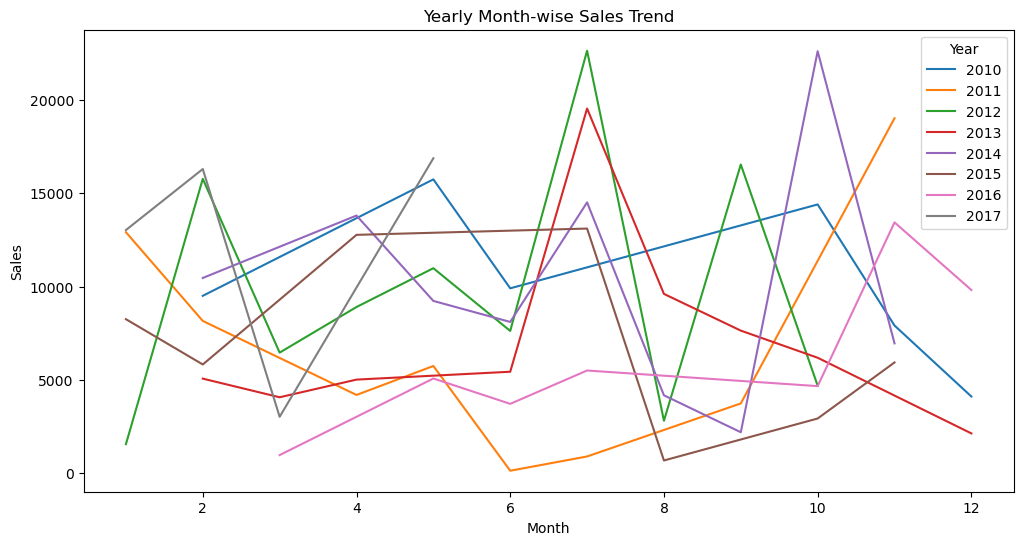

In [12]:
import matplotlib.pyplot as plt

# Converting 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extracting year and month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Aggregate sales by month
monthly_sales = df.groupby(['Year', 'Month'])['Units Sold'].sum().reset_index()

# Plotting the month-wise sales trend
plt.figure(figsize=(12, 6))
for year in monthly_sales['Year'].unique():
    data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(data['Month'], data['Units Sold'], label=str(year))

plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()


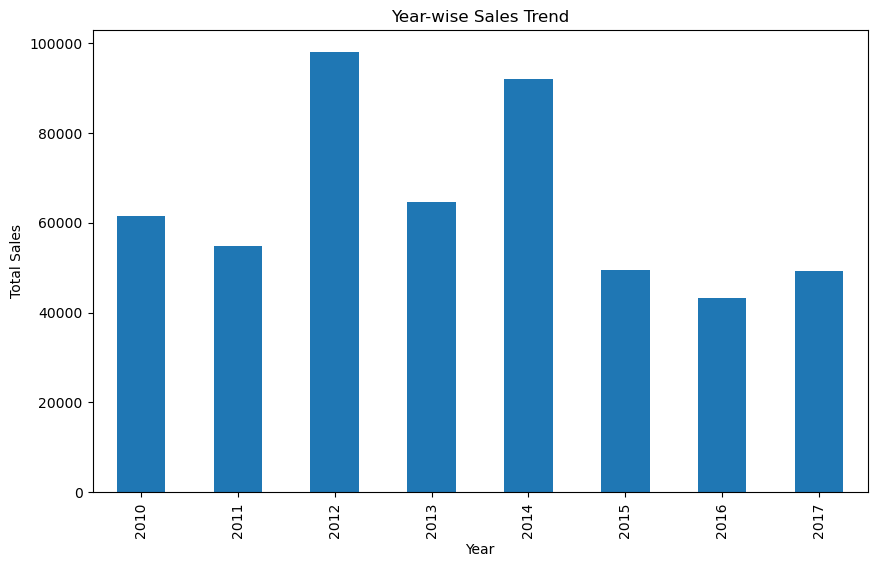

In [9]:
# Aggregate sales by year
yearly_sales = df.groupby('Year')['Units Sold'].sum()

# Ploting the year-wise sales trend
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


Total Units Sold: 512871
Average Unit Price: 276.7613
Total Profit: 44168198.39999999


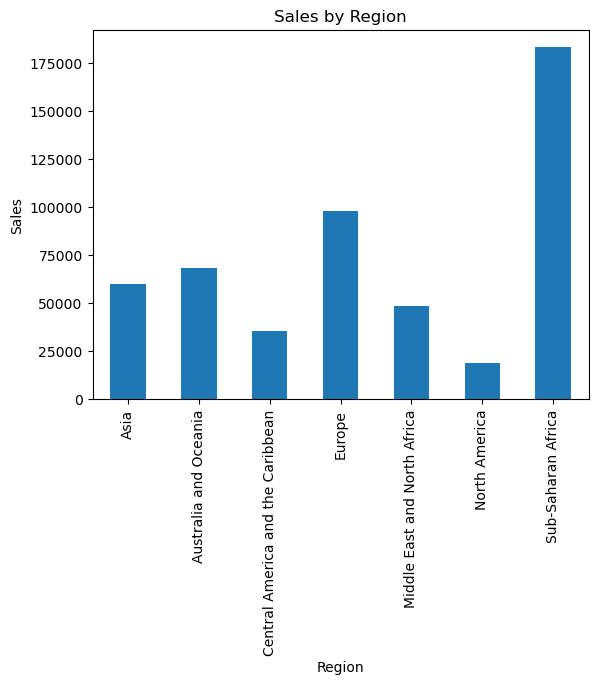

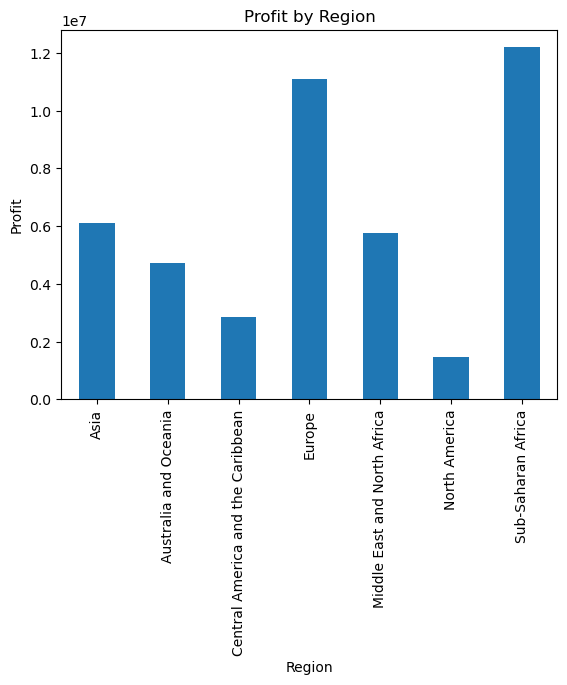

In [20]:
##Case 2: Key Metrics and Factors Analysis

# Calculate key metrics

total_units_sold = df['Units Sold'].sum()
average_unit_price = df['Unit Price'].mean()
total_profit = df['Total Profit'].sum()


print(f"Total Units Sold: {total_units_sold}")
print(f"Average Unit Price: {average_unit_price}")
print(f"Total Profit: {total_profit}")

# Analyzing the relationship between region and key metrics
region_sales = df.groupby('Region')['Units Sold'].sum()
region_profit = df.groupby('Region')['Total Profit'].sum()

# Visualizing the relationship using bar charts
region_sales.plot(kind='bar', title='Sales by Region', ylabel='Sales')
plt.show()

region_profit.plot(kind='bar', title='Profit by Region', ylabel='Profit')
plt.show()


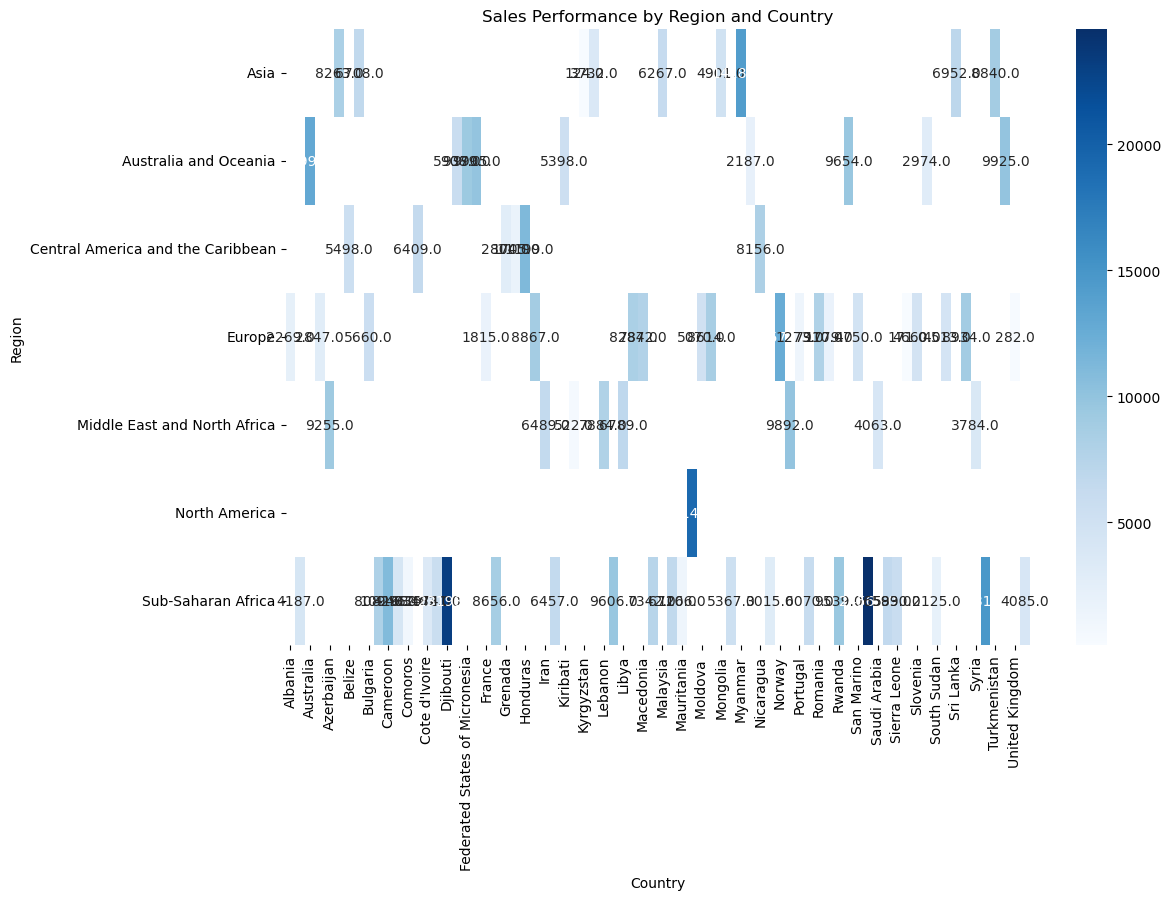

In [21]:
##Case 3: Sales Performance by Region and Country

import seaborn as sns

# Aggregate sales by region and country
region_country_sales = df.groupby(['Region', 'Country'])['Units Sold'].sum().unstack()

# Visualizing using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(region_country_sales, cmap='Blues', annot=True, fmt=".1f")
plt.title('Sales Performance by Region and Country')
plt.show()


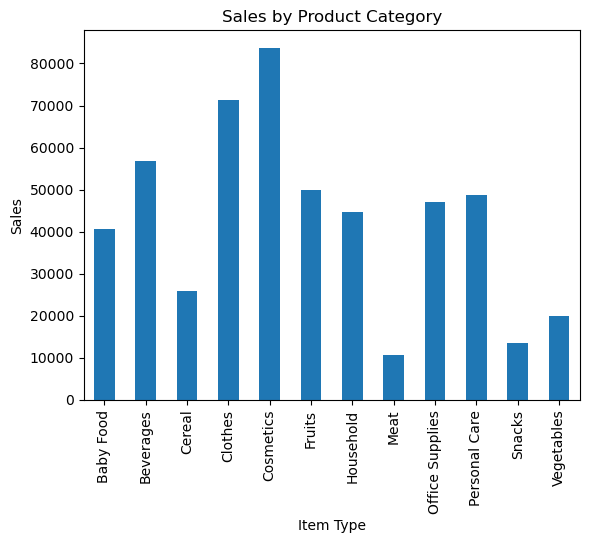

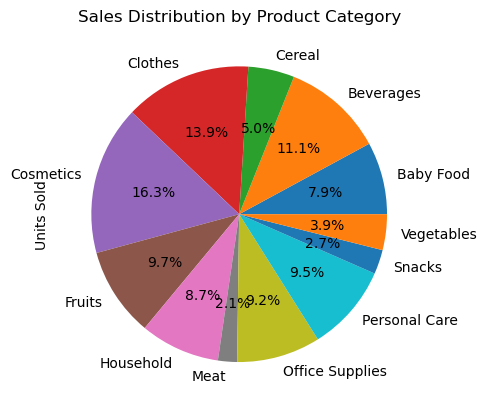

In [23]:
##Case 4: Sales Performance by Product Category
# Aggregate sales by product category
category_sales = df.groupby('Item Type')['Units Sold'].sum()

# Visualizing using bar charts and pie charts
category_sales.plot(kind='bar', title='Sales by Product Category', ylabel='Sales')
plt.show()

category_sales.plot(kind='pie', title='Sales Distribution by Product Category', autopct='%1.1f%%')
plt.show()


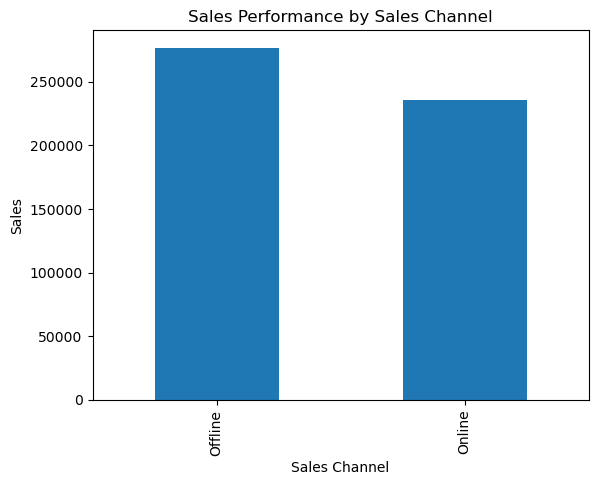

In [24]:
##Case 5: Sales Channel Analysis
# Aggregate sales by sales channel
channel_sales = df.groupby('Sales Channel')['Units Sold'].sum()

# Comparing using bar charts
channel_sales.plot(kind='bar', title='Sales Performance by Sales Channel', ylabel='Sales')
plt.show()


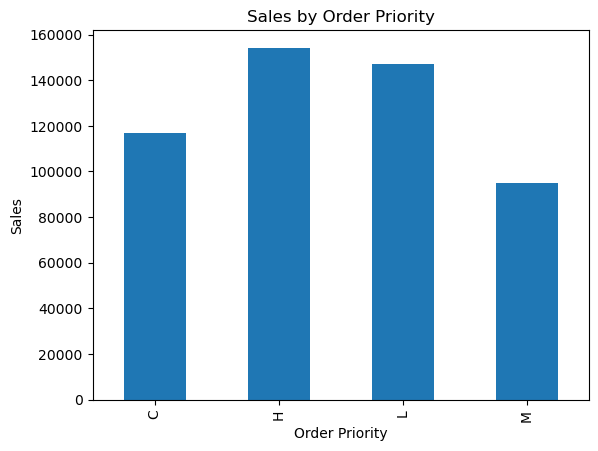

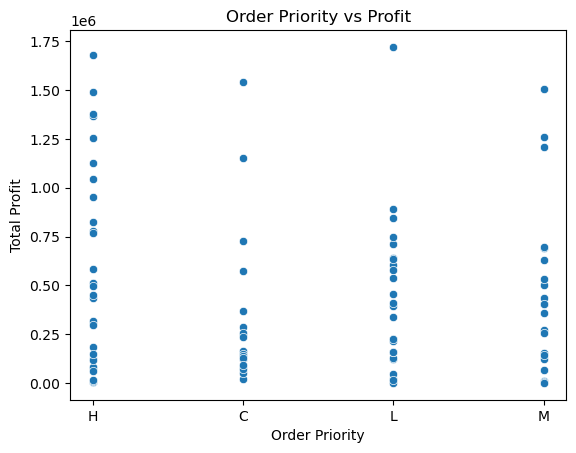

In [26]:
##Case 6: Order Priority Analysis
# Aggregate sales by order priority
priority_sales = df.groupby('Order Priority')['Units Sold'].sum()

# Visualizing using bar charts
priority_sales.plot(kind='bar', title='Sales by Order Priority', ylabel='Sales')
plt.show()

# Scatter plot to analyze the relationship between order priority and profit
sns.scatterplot(x='Order Priority', y='Total Profit', data=df)
plt.title('Order Priority vs Profit')
plt.show()


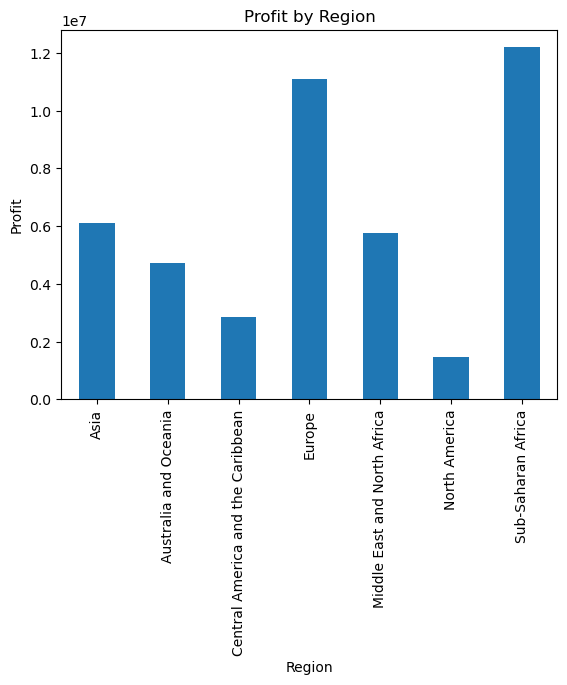

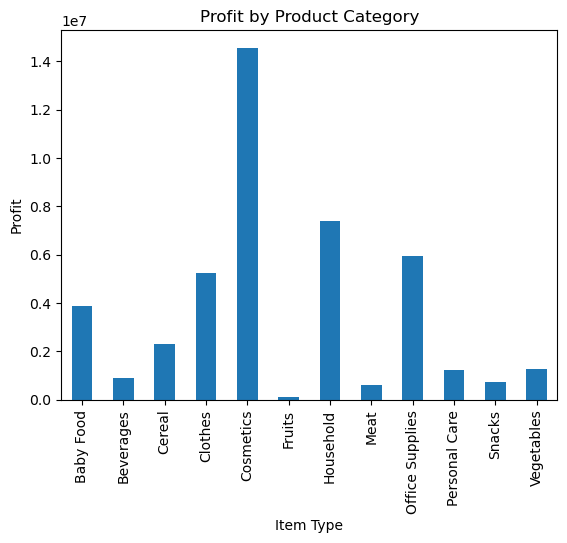

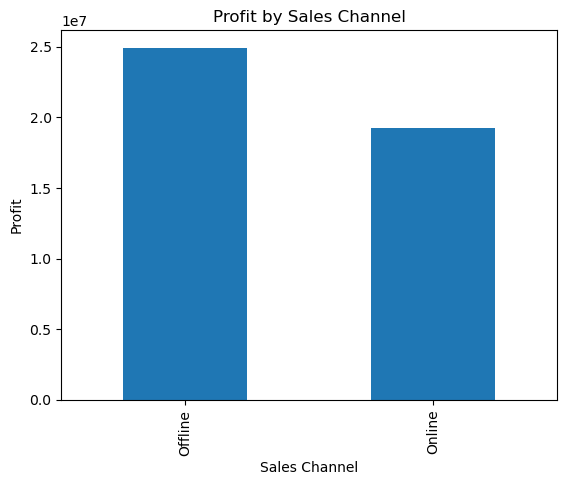

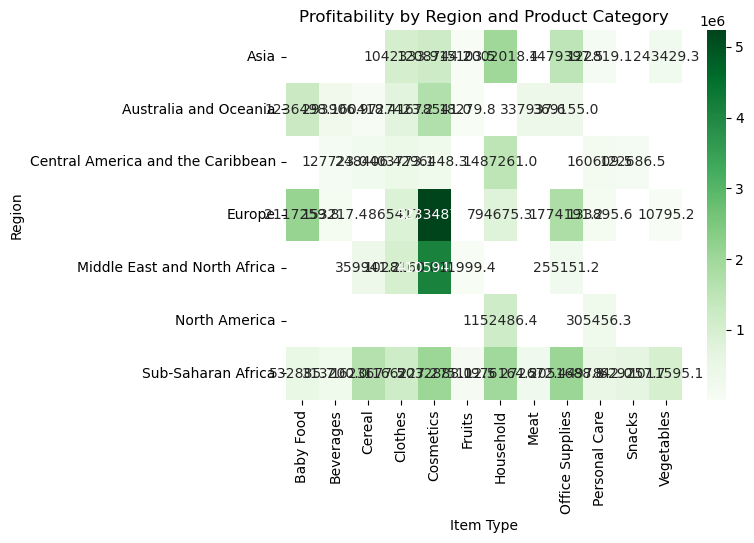

In [30]:
##Case 7: Profitability Analysis
# Calculating total profit for different regions, product categories, and sales channels
region_profit = df.groupby('Region')['Total Profit'].sum()
category_profit = df.groupby('Item Type')['Total Profit'].sum()
channel_profit = df.groupby('Sales Channel')['Total Profit'].sum()

# Visualizing profitability using bar charts and heatmaps
region_profit.plot(kind='bar', title='Profit by Region', ylabel='Profit')
plt.show()

category_profit.plot(kind='bar', title='Profit by Product Category', ylabel='Profit')
plt.show()

channel_profit.plot(kind='bar', title='Profit by Sales Channel', ylabel='Profit')
plt.show()

# Profitability heatmap by region and product category
profit_heatmap = df.groupby(['Region', 'Item Type'])['Total Profit'].sum().unstack()
sns.heatmap(profit_heatmap, cmap='Greens', annot=True, fmt=".1f")
plt.title('Profitability by Region and Product Category')
plt.show()


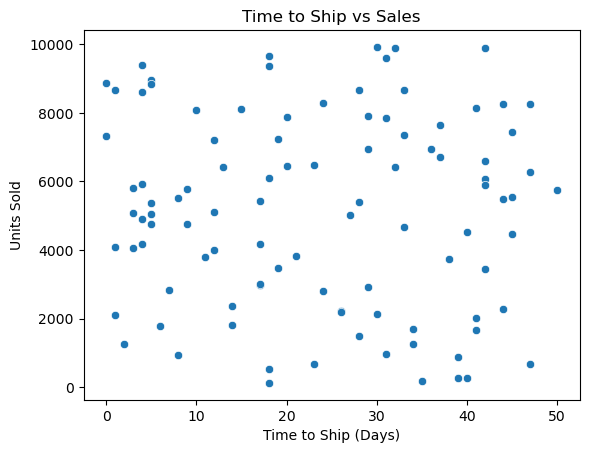

In [32]:
##Case 8: Time to Ship Analysis
# Calculating the time difference between order date and ship date
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Time to Ship (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

# Scatter plot to analyze the relationship between shipping time and sales performance
sns.scatterplot(x='Time to Ship (Days)', y='Units Sold', data=df)
plt.title('Time to Ship vs Sales')
plt.show()


           Order ID   Units Sold  Unit Price   Unit Cost  Total Revenue  \
count  3.000000e+01    30.000000   30.000000   30.000000   3.000000e+01   
mean   5.993634e+08  5140.400000  295.625333  190.268667   1.624985e+06   
std    2.557919e+08  3342.453317  201.018132  155.666487   1.766494e+06   
min    1.422784e+08   124.000000    9.330000    6.920000   1.910344e+04   
25%    4.643520e+08  1890.500000  154.060000   90.930000   3.525953e+05   
50%    6.649047e+08  6023.000000  230.490000  138.265000   7.694720e+05   
75%    8.008398e+08  8208.000000  437.200000  263.330000   2.449986e+06   
max    9.940222e+08  9925.000000  668.270000  524.960000   5.997055e+06   

         Total Cost  Total Profit         Year      Month  Time to Ship (Days)  
count  3.000000e+01  3.000000e+01    30.000000  30.000000            30.000000  
mean   1.061932e+06  5.630533e+05  2013.666667   6.866667            21.400000  
std    1.306407e+06  5.127329e+05     2.218004   3.115405            12.952433  


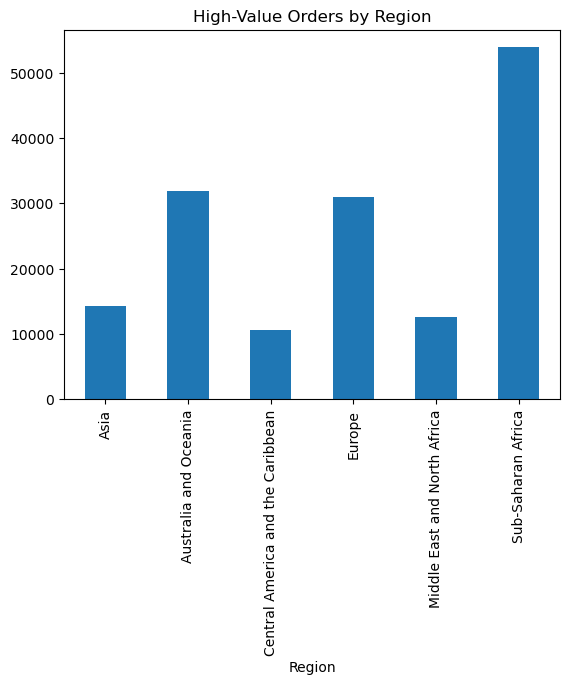

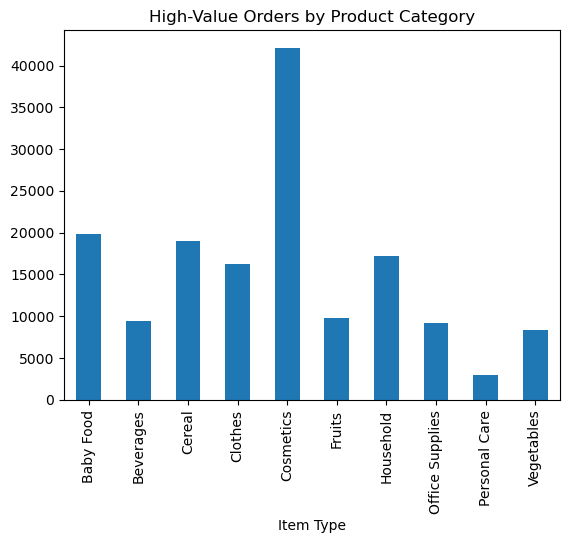

In [36]:
##Case 9: High-Value Orders Analysis
# Filtering high-value orders (e.g., orders with total revenue > threshold)
high_value_orders = df[df['Order Priority'] == "H"]  # Adjust the threshold as needed

# Analyzing the characteristics of high-value orders
print(high_value_orders.describe())

# Visualizing the distribution of high-value orders by region and product category
high_value_orders.groupby('Region')['Units Sold'].sum().plot(kind='bar', title='High-Value Orders by Region')
plt.show()

high_value_orders.groupby('Item Type')['Units Sold'].sum().plot(kind='bar', title='High-Value Orders by Product Category')
plt.show()


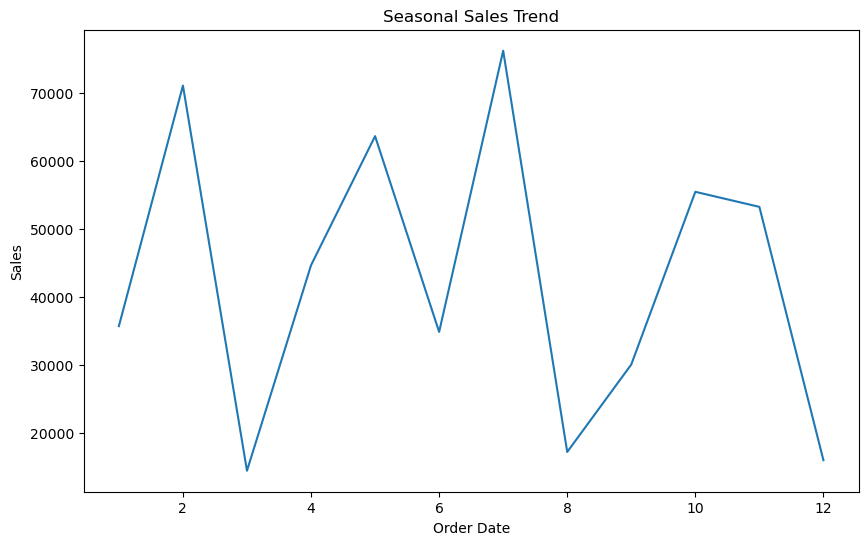

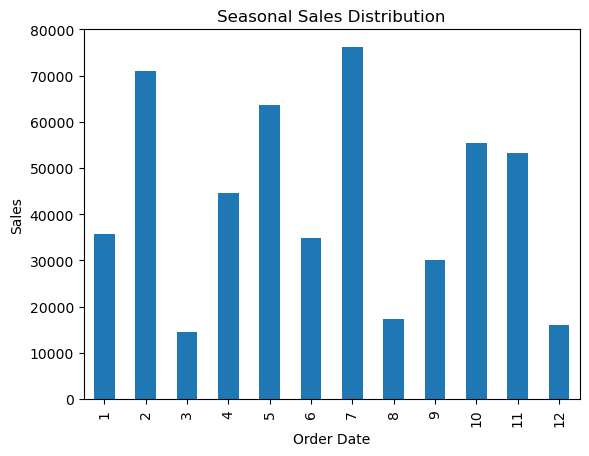

In [37]:
##Case 10: Seasonal Sales Analysis
# Aggregate sales data by month to identify seasonal trends
monthly_sales = df.groupby(df['Order Date'].dt.month)['Units Sold'].sum()

# Visualizing seasonal sales patterns using line charts and bar charts
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', title='Seasonal Sales Trend', ylabel='Sales')
plt.show()

monthly_sales.plot(kind='bar', title='Seasonal Sales Distribution', ylabel='Sales')
plt.show()


In [17]:
df.columns


Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Year',
       'Month'],
      dtype='object')